---
---
#**年度ごとに分割して分散表現を作れ！！！！**

In [ ]:
!pip install torch transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.4 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("cyberagent/open-calm-7b", device_map="auto", torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained("cyberagent/open-calm-7b")

model.to("cuda")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(52224, 4096)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=4096, out_features=12288, bias=True)
          (dense): Linear(in_features=4096, out_features=4096, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=4096, out_features=16384, bias=True)
          (dense_4h_to_h): Linear(in_features=16384, out_features=4096, bias=True)

---
---
---
---

ドライブマウント

In [ ]:
from google.colab import drive

# Google ドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


csv読み込み

ヘッダー表示

In [ ]:
import csv

# csvファイルのパス
csv_path = '/content/drive/MyDrive/df_2023'

# csvファイルを開く
with open(csv_path, 'r', encoding='utf-8') as f:
  # csvファイルのヘッダーを取得する
  reader = csv.reader(f)
  row_name = next(reader) # ヘッダー

print("ヘッダー : ",row_name)

ヘッダー :  ['日付', '発言者名', '発言内容', '院名', '会派', '性別(男1,女0)']


In [ ]:
import pandas as pd

talks = pd.read_csv(csv_path)

talks

,日付,発言者名,発言内容,院名,会派,"性別(男1,女0)"
0,2023-06-21,細田博之,これより会議を開きます,衆議院,無所属,1
1,2023-06-21,細田博之,佐々木紀君の動議に御異議ありませんか,衆議院,無所属,1
2,2023-06-21,細田博之,御異議なしと認めます,衆議院,無所属,1
3,2023-06-21,細田博之,裁判所の人的・物的充実に関する請願外四百五十三請願を一括して議題といたします,衆議院,無所属,1
4,2023-06-21,細田博之,各請願は委員長の報告を省略して採択するに御異議ありませんか,衆議院,無所属,1
...,...,...,...,...,...,...
30326,2023-01-24,大島九州男,生活者が苦しみ疲弊するようでは、国は衰退します,参議院,れいわ新選組,1
30327,2023-01-24,大島九州男,国民生活を救うことができない、こんな政治は許せません,参議院,れいわ新選組,1
30328,2023-01-24,大島九州男,我々れいわ新選組は、消費税やガソリン税ゼロ、季節ごとの十万円給付のほか、奨学金全額免除、家賃...,参議院,れいわ新選組,1
30329,2023-01-24,大島九州男,そして、私自身、十二年の国会活動で目指してきた民間教育の力を生かした公教育の実現、統合医療の...,参議院,れいわ新選組,1


発言内容の分散表現

In [ ]:
talk_list_vec = []

for i, talk in enumerate(talks['発言内容']):

  inputs = tokenizer(talk, return_tensors="pt", padding=True, truncation=True)
  input_ids = inputs['input_ids'].to('cuda')
  attention_mask = inputs['attention_mask'].to('cuda')
  with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask,  output_hidden_states=True)
    last_hidden_state = outputs.hidden_states[-1]

  sentence_vec = last_hidden_state.mean(dim=1).squeeze(dim=0).cpu().numpy() #文章の平均計算

  talk_list_vec.append(sentence_vec)

In [ ]:
len(talk_list_vec)

30331

サイズ確認

In [ ]:
import numpy as np

a = np.array(talk_list_vec)

a.shape

(30331, 4096)

分散表現を保存

In [ ]:
import numpy as np
import pandas as pd

# ndarrayをDataFrameに変換
df = pd.DataFrame(talk_list_vec)

# CSVファイルに保存
df.to_csv('/content/drive/MyDrive/df_2023_vec.csv', index=False)

# クラスタリング

In [ ]:
!pip install pyclustering
from pyclustering.utils.metric import distance_metric

In [ ]:
# 分散表現をもってくる
import csv
import pandas as pd
import re

with open('/content/drive/MyDrive/JP vec/JP_vec_2018.csv', "r", encoding="utf-8") as f:
  reader = csv.reader(f, delimiter=' ')
  a = list(reader)

jp_vec_data = [[float(x) for x in row] for row in a]

In [ ]:
type(jp_vec_data)

df = pd.DataFrame(jp_vec_data)

# CSVファイルに保存
df.to_csv('/content/drive/MyDrive/Cyber_JP2018_vec.csv', index=False)

In [ ]:
from pyclustering.cluster.xmeans import xmeans
import numpy as np

# 分散表現をまとめたやつをクラスタリングの対象になるようにする
vectors_np = np.array(jp_vec_data)

# x-means クラスタリングのインスタンスを作成：対象データセットを指定
xmeans_instance = xmeans(vectors_np, kmax=25)

# クラスタリングを実行
xmeans_instance.process()

# クラスタリング結果を取得
labels_x = xmeans_instance.get_clusters()  # 各データの所属クラスタのインデックス

# ラベル付け結果の表示
for i, label in enumerate(labels_x):
    print(f"ラベル{i+1}の発言: {talks['発言内容'][label]}")

NameError: ignored

In [ ]:
for i, label in enumerate(labels_x):
    print(f"ラベル{i+1}の発言: {label}")

ラベル1の発言: [241, 247, 261, 276, 295, 301, 321, 337, 375, 591, 871, 872, 905, 906, 1266, 1267, 1286, 1287, 1316, 1669, 1670, 1695, 1882, 1999, 2000, 2329, 2330, 2745, 2760, 2874, 4030, 4045, 4060, 4469, 4475, 4481, 4487, 4493, 4553, 4559, 4573, 4588, 4602, 5213, 5218, 5886, 6159, 6160, 6164, 6480, 6486, 6588, 7261, 7264, 7265, 7868, 9032, 12552, 12985, 12997, 14268, 14269, 14273, 14582, 14583, 14605, 14625, 14678, 14756, 15026, 15027, 15031, 15054, 15366, 15367, 15611, 15617, 15637, 15939, 15940, 16011, 16027, 16046, 16131, 16321, 16322, 16369, 16374, 16694, 16700, 16721, 16741, 17454, 17460, 17477, 18147, 18335, 18626, 18632, 18649, 18945, 18946, 18989, 19191, 19197, 19203, 19209, 19229, 19928, 19934, 20345, 20346, 20350, 20372, 20386, 20401, 20600, 20613, 20619, 21069, 21070, 21074, 21334, 21353, 21359, 21373, 21389, 21409, 21415, 21431, 22284, 22300, 22316, 22331, 22355, 22923, 22940, 22955, 24796, 24813, 24828, 24844, 24859, 24868, 25986, 25992, 26693, 26694, 26698, 27350, 27369, 2737

In [ ]:
# CSVファイルに書き込む
with open('/content/drive/MyDrive/JP vec/JP_vec_2018_cluster', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(labels_x)

In [ ]:
with open('/content/drive/MyDrive/JP vec/JP_vec_2018_cluster', "r", encoding="utf-8") as f:
  reader = csv.reader(f)
  a = list(reader)

labels_x = [[int(x) for x in row] for row in a]

labels_x = np.array(labels_x)

<ipython-input-16-b803efcb631a>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels_x = np.array(labels_x)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# プロットをまとめるためのサブプロットを作成
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

for c, cluster in enumerate(labels_x):
  cluster_data = []
  for i in cluster:
    cluster_data.append(jp_vec_data[i])
  # t-SNEによる次元削減とマッピング
  data = np.array(cluster_data)
  tsne = TSNE(n_components=2, perplexity=1, n_iter=2000, learning_rate=50, min_grad_norm=1e-6)
  mapped_data = tsne.fit_transform(data)

  # カラーマップから特定の色を選択
  cmap = plt.get_cmap('rainbow')
  color = cmap(c / len(labels_x))  # 色の選択

  ax1.scatter(mapped_data[:, 0], mapped_data[:, 1], color=color)
  ax2.scatter(mapped_data[:, 0], mapped_data[:, 1],color='black')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


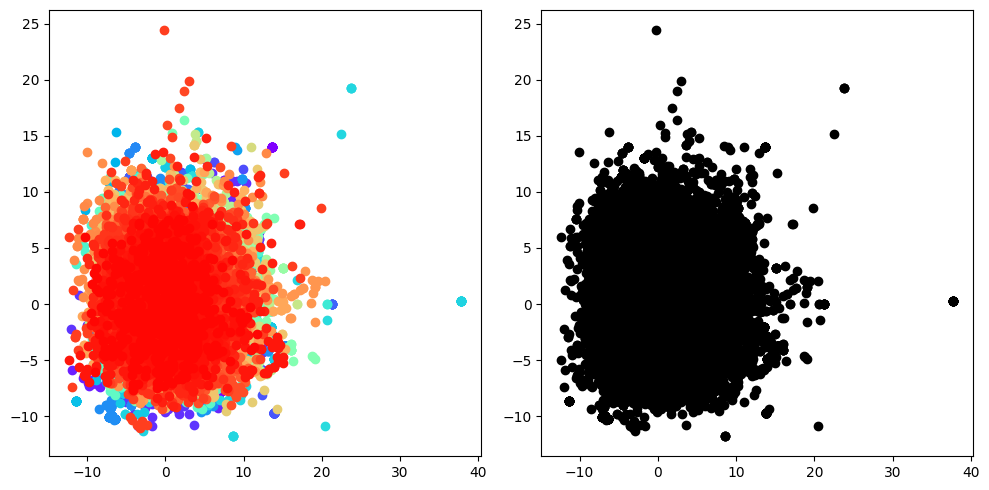

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# プロットをまとめるためのサブプロットを作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for c, cluster in enumerate(labels_x):
    cluster_data = []
    for i in cluster:
        cluster_data.append(jp_vec_data[i])

    # PCAによる次元削減とマッピング
    data = np.array(cluster_data)
    pca = PCA(n_components=2, svd_solver='auto')
    mapped_data = pca.fit_transform(data)

    # カラーマップから特定の色を選択
    cmap = plt.get_cmap('rainbow')
    color = cmap(c / len(labels_x))  # 色の選択

    ax1.scatter(mapped_data[:, 0], mapped_data[:, 1], color=color)
    ax2.scatter(mapped_data[:, 0], mapped_data[:, 1], color='black')

plt.tight_layout()
plt.show()
